{'clean': [88.73, 92.31, 64.6, 83.72, 90.98, 94.63], 'brightness': [86.328, 90.29, 63.312, 81.57, 88.768, 92.97], 'contrast': [65.492, 71.998, 43.748, 58.506, 70.022, 80.108], 'defocus_blur': [75.0, 80.09, 57.138, 70.946, 77.896, 84.298], 'elastic_transform': [73.258, 78.34, 57.192, 68.618, 76.72, 83.282], 'fog': [78.072, 83.922, 57.5, 72.9, 80.4, 88.792], 'frost': [66.922, 74.356, 50.29, 65.13, 76.448, 82.468], 'gaussian_blur': [67.738, 72.624, 51.498, 64.758, 70.65, 78.342], 'gaussian_noise': [39.048, 27.442, 39.828, 41.85, 26.884, 34.532], 'glass_blur': [44.112, 50.176, 36.294, 38.696, 50.936, 51.608], 'impulse_noise': [47.44, 32.374, 41.96, 50.142, 31.892, 37.686], 'jpeg_compression': [71.862, 73.758, 60.856, 69.26, 73.438, 75.296], 'motion_blur': [67.276, 72.228, 47.508, 63.686, 70.786, 77.928], 'pixelate': [62.694, 67.058, 52.644, 61.72, 62.19, 69.854], 'saturate': [83.846, 87.672, 58.116, 78.502, 85.506, 90.558], 'shot_noise': [48.926, 38.886, 44.094, 49.792, 40.21, 47.522], 'sn

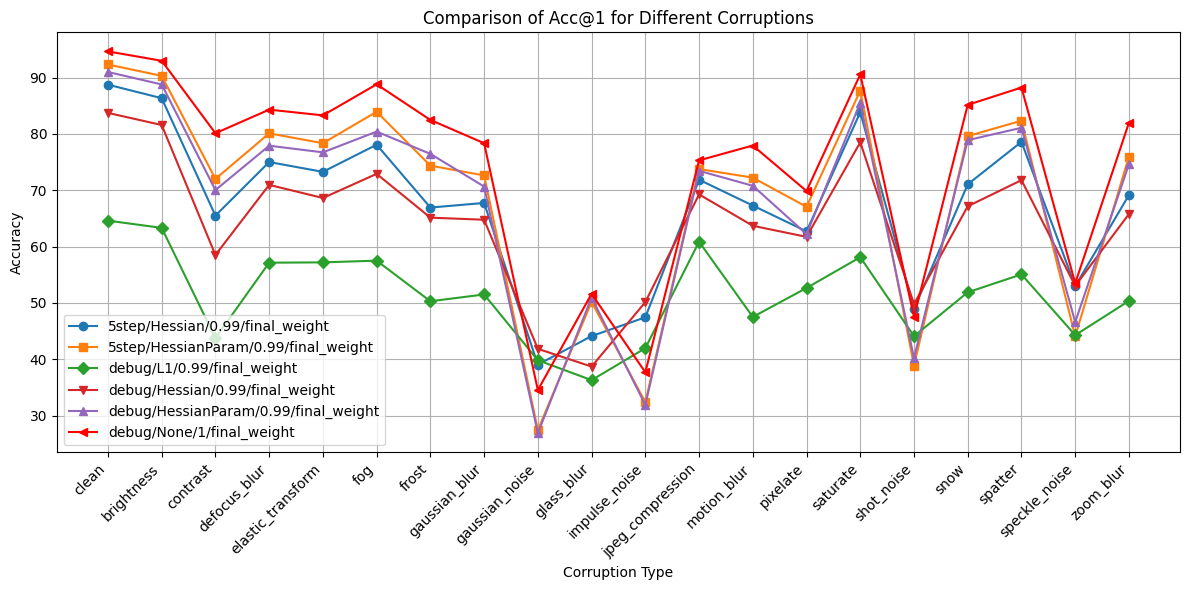

In [4]:
import matplotlib.pyplot as plt
import os
import glob
Acc1_dict = {'clean': [], 'brightness': [], 'contrast': [], 'defocus_blur': [], 'elastic_transform': [], 'fog': [], 'frost': [], 'gaussian_blur': [], 'gaussian_noise': [], 'glass_blur': [],
             'impulse_noise': [], 'jpeg_compression': [], 'motion_blur': [], 'pixelate': [], 'saturate': [], 'shot_noise': [], 'snow': [], 'spatter': [], 'speckle_noise': [], 'zoom_blur': []}
# paths = ['logs/debug/ResNet18/CIFAR10/L1/0.0001/42/0.5/20250109110709/test/100', 'logs/debug/ResNet18/CIFAR10/Hessian/0.0001/42/0.5/20250109131035/test/100', 'logs/debug/ResNet18/CIFAR10/None/0.0001/42/0.5/20250109151522/test/final_weight']
paths = glob.glob('logs/5step/ResNet18/CIFAR10/*/0.0001/42/0.99/*/test/final_weight')
paths.extend(list(glob.glob('logs/debug/ResNet18/CIFAR10/*/0.0001/42/0.99/*/test/final_weight')))
paths.append('logs/debug/ResNet18/CIFAR10/None/0.0001/42/1/20250109151522/test/final_weight')

for path in paths:
    with open(os.path.join(path, 'total_result.txt')) as f:
        lines = f.readlines()
    # Acc1 = []
    for line in lines:
        line = line.split(' ')
        # Add the accuracy to the corresponding list
        Acc1_dict[line[1].strip('*')].append(float(line[line.index('Acc@1') + 1]))
Acc1_dict = {k: v for k, v in Acc1_dict.items() if v}
print(Acc1_dict)
# Plot Accuracy and save figure
# xlabel is Acc1_dict key and ylabel is Acc1_dict value
x_labels = list(Acc1_dict.keys())
markars = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
plt.figure(figsize=(12, 6))
for i in range(len(Acc1_dict[list(Acc1_dict.keys())[0]])-1):
    y_values = [Acc1_dict[key][i] for key in x_labels]
    plt.plot(x_labels, y_values, marker=markars[i], label=(paths[i].split('/')[1]+'/'+paths[i].split('/')[4]+'/'+paths[i].split('/')[7]+'/'+paths[i].split('/')[10]), linestyle='-')
y_values = [Acc1_dict[key][i+1] for key in x_labels]
plt.plot(x_labels, y_values, marker=markars[i+1], label=(paths[i+1].split('/')[1]+'/'+paths[i+1].split('/')[4]+'/'+paths[i+1].split('/')[7]+'/'+paths[i+1].split('/')[10]), color='r', linestyle='-')

plt.xlabel('Corruption Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Acc@1 for Different Corruptions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('corruption_comparison.png')
plt.show()